In [1]:
import cv2
import matplotlib.pyplot as plt

import Utils.showImages as showImg
import Utils.pointProcessing as pp
from skimage.metrics import structural_similarity as ssim


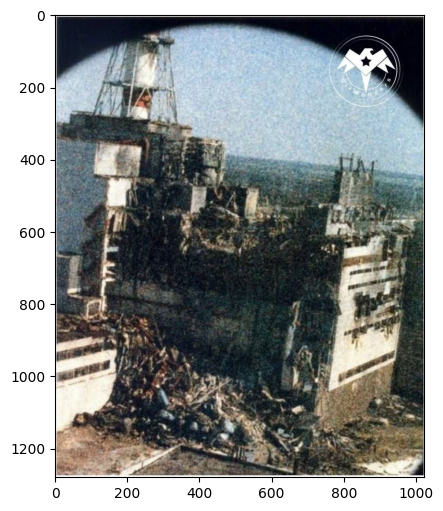

In [2]:
IMAGE_PATH = 'images\\noisy.jpg'
ORIGINAL_IMAGE = cv2.imread(IMAGE_PATH)
ORIGINAL_IMAGE = cv2.cvtColor(ORIGINAL_IMAGE, cv2.COLOR_BGR2RGB)

showImg.show_img_plt(ORIGINAL_IMAGE)


h:\GITHUB\BasicDIP\Utils\pointProcessing.py:31: RuntimeWarning: divide by zero encountered in log
  log_transformed = c * np.log(1 + image)
h:\GITHUB\BasicDIP\Utils\pointProcessing.py:33: RuntimeWarning: invalid value encountered in cast
  log_transformed = np.array(log_transformed, dtype='uint8')


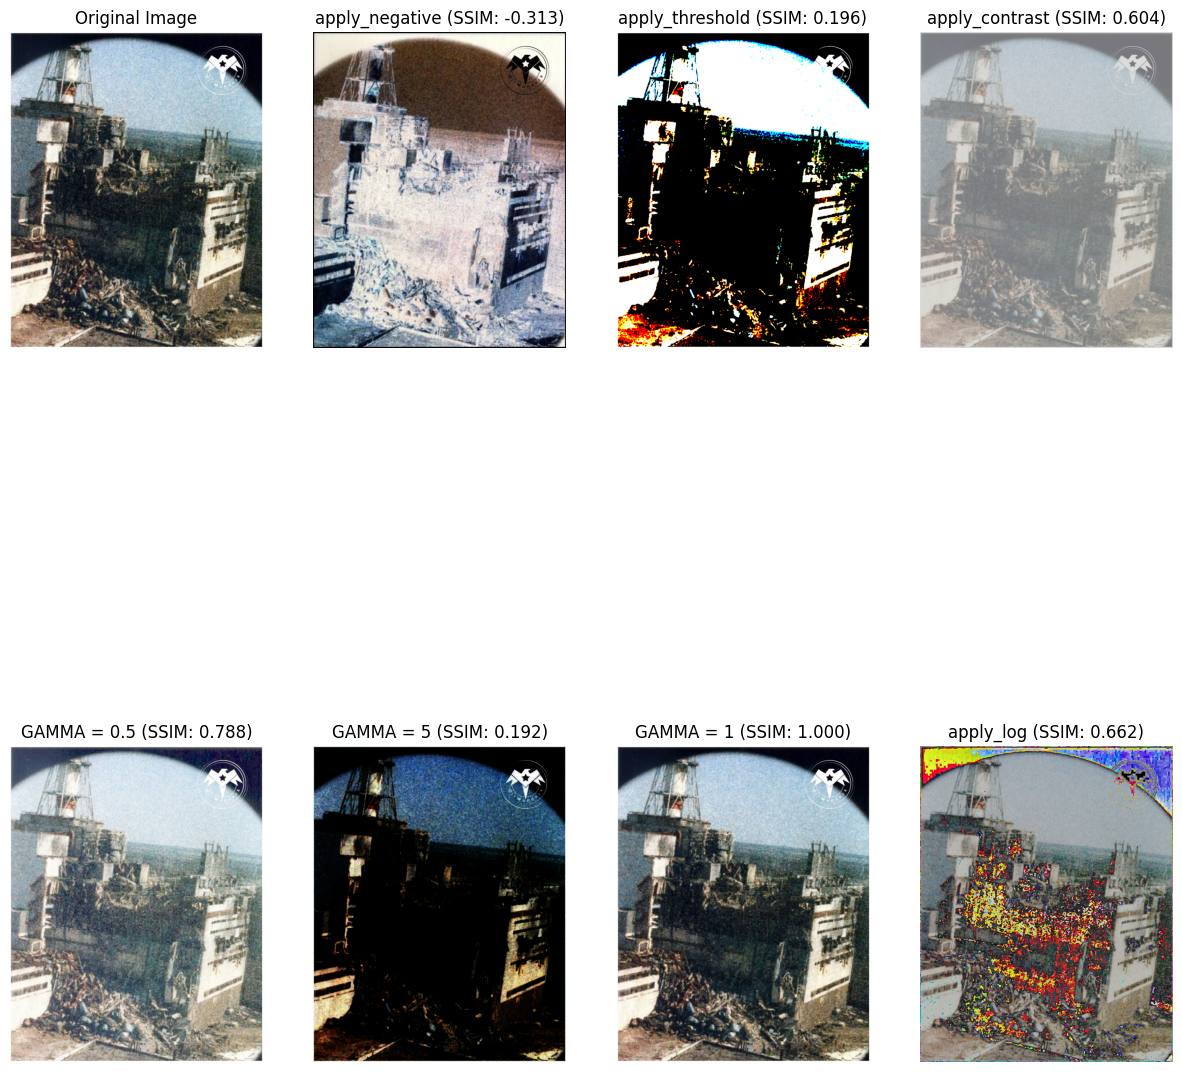

In [3]:
ch1 = pp.apply_negative(ORIGINAL_IMAGE)
mssim_ch1, grad = ssim(ORIGINAL_IMAGE, ch1, full=True, win_size = 7, channel_axis=2)

ch2 = pp.apply_threshold(ORIGINAL_IMAGE, 150)
mssim_ch2, grad = ssim(ORIGINAL_IMAGE, ch2, full=True, win_size = 7, channel_axis=2)

ch3 = pp.apply_contrast_stretching(ORIGINAL_IMAGE, 120, 220)
mssim_ch3, grad = ssim(ORIGINAL_IMAGE, ch3, full=True, win_size = 7, channel_axis=2)

ch4 = pp.apply_gamma_correction(ORIGINAL_IMAGE, .5)
mssim_ch4, grad = ssim(ORIGINAL_IMAGE, ch4, full=True, win_size = 7, channel_axis=2)

ch5 = pp.apply_gamma_correction(ORIGINAL_IMAGE, 5)
mssim_ch5, grad = ssim(ORIGINAL_IMAGE, ch5, full=True, win_size = 7, channel_axis=2)

ch6 = pp.apply_gamma_correction(ORIGINAL_IMAGE, 1)
mssim_ch6, grad = ssim(ORIGINAL_IMAGE, ch6, full=True, win_size = 7, channel_axis=2)

ch7 = pp.apply_log_transform(ORIGINAL_IMAGE, 80)
mssim_ch7, grad = ssim(ORIGINAL_IMAGE, ch7, full=True, win_size = 7, channel_axis=2)



showImg.show_mult_img(2, 4,\
    [ORIGINAL_IMAGE, ch1, ch2, ch3, ch4, ch5, ch6, ch7],\
    ['Original Image',\
        f'apply_negative (SSIM: {mssim_ch1:.3f})',\
        f'apply_threshold (SSIM: {mssim_ch2:.3f})',\
        f'apply_contrast (SSIM: {mssim_ch3:.3f})',\
        f'GAMMA = 0.5 (SSIM: {mssim_ch4:.3f})',\
        f'GAMMA = 5 (SSIM: {mssim_ch5:.3f})',\
        f'GAMMA = 1 (SSIM: {mssim_ch6:.3f})',\
        f'apply_log (SSIM: {mssim_ch7:.3f})'])